In [1]:
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
#PartA
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [3]:
#PartB
features = ["Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", 
            "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", 
            "Bland_Chromatin", "Normal_Nucleoli", "Mitoses"]

X = df[features]
y = df["Malignant_Cancer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [4]:
#PartC
myDecisionTree = DecisionTreeClassifier(random_state = 2)
myDecisionTree.fit(X_train, y_train)
yPerdictDt = myDecisionTree.predict(X_test)
dtScore = accuracy_score(y_test, yPerdictDt)
print ("Accuracy: " + str(dtScore))

yPerdictProbabilityDt = myDecisionTree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, yPerdictProbabilityDt[:,1], pos_label = 1)
AUC = auc(fpr, tpr)

Accuracy: 0.8666666666666667


In [5]:
#PartD
training = pd.concat([X_train, y_train], axis=1)
predictionResults = []

bootstrapSize = int(0.8 * X_train['Clump_Thickness'].count())

for i in range(0, 29):
    bootstrapData = resample(training, n_samples = bootstrapSize, random_state = i, replace = True)
    bootstrapY = bootstrapData['Malignant_Cancer']
    bootstrapX = bootstrapData[features]
    baseDecisionTree = DecisionTreeClassifier(random_state = 2)
    baseDecisionTree.fit(bootstrapX,bootstrapY)
    baseYPredict = baseDecisionTree.predict(X_test)
    predictionResults.append(baseYPredict)

predictDf = pd.DataFrame()
def getMajority(row):
    majority = 0
    for j in range(29):
        majority = majority + predictDf['Prediction_' + str(j)][row:row+1]
    return majority
    
for i in range(len(predictionResults)):
    predictDf['Prediction_' + str(i)] = predictionResults[i]

rows = predictDf['Prediction_0'].count()
column = len(predictDf.columns)
majorityList = []

for i in range(rows):
    if int(getMajority(i)) > column/2:
        majorityList.append(1)
    else:
        majorityList.append(0)
        
predictDf['Majority'] = majorityList
majorityScore = accuracy_score(y_test, predictDf['Majority'])
print("Accuarcy: " +  str(majorityScore))

avgPredictions = pd.Series([])
for i in range(rows):
    avg = getMajority(i)/45
    avgPredictions = avgPredictions.append(avg)

yPerdictProbabilityB = avgPredictions
fpr2, tpr2, thresholds2 = roc_curve(y_test, yPerdictProbabilityB, pos_label=1)
AUC2 = auc(fpr2, tpr2)

Accuarcy: 0.9111111111111111


In [6]:
#PartE
myAdaBoost = AdaBoostClassifier(n_estimators=29, random_state=2)
myAdaBoost.fit(X_train, y_train)
yPredictAda = myAdaBoost.predict(X_test)
adaScore = accuracy_score(y_test, yPredictAda)
print("Accuracy: " + str(adaScore))

yPerdictProbabilityAda = myAdaBoost.predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, yPerdictProbabilityAda[:,1], pos_label=1)
AUC3 = auc(fpr3, tpr3)
print ('AUC: ' + str(AUC3))

Accuracy: 0.9555555555555556
AUC: 0.9653361344537815


In [7]:
#PartF
myXGBoost = XGBClassifier(n_stimators = 29, random_state=2)
myXGBoost.fit(X_train, y_train)
yPredictXGB = myXGBoost.predict(X_test)
xgbScore = accuracy_score(y_test, yPredictXGB)
print("Accuracy: " + str(xgbScore))

yPredictProbabilityXGB = myXGBoost.predict_proba(X_test)
fpr4, tpr4, thresholds4 = roc_curve(y_test, yPredictProbabilityXGB[:,1], pos_label=1)
AUC4 = auc(fpr4, tpr4)
print('AUC: ' + str(AUC4))

Accuracy: 0.9333333333333333
AUC: 0.963235294117647


In [8]:
#PartG
myRandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=2)
myRandomForest.fit(X_train, y_train)
yPredictRf = myRandomForest.predict(X_test)
rfScore = accuracy_score(y_test, yPredictRf)
print("Accuracy: " + str(rfScore))

yPerdictProbabilityRf = myRandomForest.predict_proba(X_test)
fpr5, tpr5,thresholds5 = roc_curve(y_test, yPerdictProbabilityRf[:,1], pos_label=1)
AUC5 = auc(fpr5, tpr5)
print('AUC: ' + str(AUC5))

Accuracy: 0.9555555555555556
AUC: 0.9516806722689075


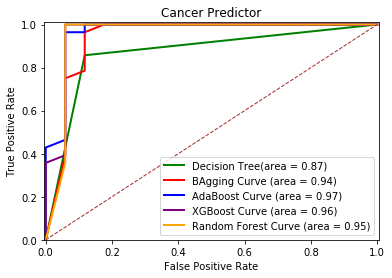

In [9]:
#PartH

plt.figure()
plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'Decision Tree(area = %0.2f)'%AUC)

plt.plot(fpr2, tpr2, color = 'red', lw = 2, label = 'BAgging Curve (area = %0.2f)'%AUC2)

plt.plot(fpr3, tpr3, color = 'blue', lw = 2, label = 'AdaBoost Curve (area = %0.2f)'%AUC3)

plt.plot(fpr4, tpr4, color = 'purple', lw = 2, label = 'XGBoost Curve (area = %0.2f)'%AUC4)

plt.plot(fpr5, tpr5, color = 'orange', lw = 2, label = 'Random Forest Curve (area = %0.2f)'%AUC5)

plt.plot([0, 1], [0, 1], color = 'brown', lw = 1, linestyle = '--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Predictor')
plt.legend(loc = "lower right")
plt.show()

In [10]:
print("Decision Tree Score: " + str(dtScore))
print ("Voting Score: " + str(majorityScore))
print ("AdaBoost Score: " + str(adaScore))
print ("XGBoost Score: " + str(xgbScore))
print ("Random Forest Score: " +  str(rfScore))

Decision Tree Score: 0.8666666666666667
Voting Score: 0.9111111111111111
AdaBoost Score: 0.9555555555555556
XGBoost Score: 0.9333333333333333
Random Forest Score: 0.9555555555555556


In [11]:
print ("Decision Tree AUC: " + str(AUC))
print ("Voting AUC: " + str(AUC2))
print ("AdaBoost AUC: " + str(AUC3))
print ("XGBoost AUC: " + str(AUC4))
print ("Random Forest AUC: " + str(AUC5))



#-Which algorithm is the best w.r.t the AUC value? - AdaBoost
#- Which algorithm is the best w.r.t the Accuracy value? - AdaBoost and RandomForest both are tied
#- Which algorithm is the best when we want a False Positive Rate of %7? - Random Forest

Decision Tree AUC: 0.8697478991596639
Voting AUC: 0.9380252100840336
AdaBoost AUC: 0.9653361344537815
XGBoost AUC: 0.963235294117647
Random Forest AUC: 0.9516806722689075
